<a href="https://colab.research.google.com/github/JoshJingtianWang/Using-images-of-breast-masses-to-predict-the-prognosis-of-breast-cancer-into-two-classes-non-recur/blob/main/randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')
!pwd

Mounted at /content/drive
/content


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
os.chdir('/content/drive/MyDrive/Spitale Lab/Fundamentals_of_Data_Science/module 6')

In [ ]:
!pwd

/content/drive/MyDrive/Spitale Lab/Fundamentals_of_Data_Science/module 6


In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm, datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
#from sklearn.datasets import load_breast_cancer

In [ ]:
#read data
#manually adding header since it's not included in data
dataset=pd.read_csv('wpbc.data',names=['ID Number', 'Outcome', 'Time', 'Mean radius', 'Mean texture', 'Mean perimeter', 
                                       'Mean area', 'Mean smoothness', 'Mean compactness', 'Mean concavity', 'Mean concave points', 
                                       'Mean symmetry', 'Mean fractal dimension', 'radius SE', 'texture SE', 'perimeter SE', 'area SE', 
                                       'smoothness SE', 'compactness SE', 'concavity SE', 'concave points SE', 'symmetry SE', 
                                       'fractal dimension SE', 'Worst radius', 'Worst texture', 'Worst area', 'Worst perimeter', 
                                       'Worst smoothness', 'Worst compactness', 'Worst concavity', 'Worst concave points', 
                                       'Worst symmetry', 'Worst fractal dimension', 'Tumor size', 'Lymph node status'])

In [ ]:
dataset.shape

(198, 35)

In [ ]:
dataset.head()

(array([ 2.,  0.,  1.,  2.,  5.,  9.,  8., 15., 23., 18., 18., 16., 17.,
        12.,  9.,  9.,  3.,  7.,  2.,  6.,  2.,  1.,  7.,  2.,  0.,  1.,
         0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.1565    , 0.17059167, 0.18468333, 0.198775  , 0.21286667,
        0.22695833, 0.24105   , 0.25514167, 0.26923333, 0.283325  ,
        0.29741667, 0.31150833, 0.3256    , 0.33969167, 0.35378333,
        0.367875  , 0.38196667, 0.39605833, 0.41015   , 0.42424167,
        0.43833333, 0.452425  , 0.46651667, 0.48060833, 0.4947    ,
        0.50879167, 0.52288333, 0.536975  , 0.55106667, 0.56515833,
        0.57925   , 0.59334167, 0.60743333, 0.621525  , 0.63561667,
        0.64970833, 0.6638    ]),
 <a list of 36 Patch objects>)

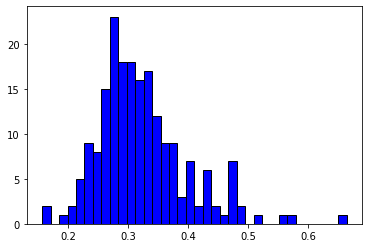

In [ ]:
dataset['Worst symmetry']
plt.hist(dataset['Worst symmetry'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

In [ ]:
dataset['Lymph node status'].value_counts()

0     87
1     35
2     17
4     10
13     6
7      6
9      4
3      4
?      4
15     3
11     3
6      3
27     2
8      2
10     2
20     2
5      2
16     1
14     1
17     1
21     1
24     1
18     1
Name: Lymph node status, dtype: int64

In [ ]:
dataset['Lymph node status'].replace({"?": 0}, inplace=True)

In [ ]:
X = dataset.drop(['ID Number','Outcome','Time'], axis=1)
y = dataset['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_jobs=2, random_state=0)

clf=classifier.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [ ]:
print("Accuracy", metrics.accuracy_score(y_test,y_pred))

Accuracy 0.7333333333333333


In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.75      0.96      0.84        45
           R       0.33      0.07      0.11        15

    accuracy                           0.73        60
   macro avg       0.54      0.51      0.48        60
weighted avg       0.65      0.73      0.66        60



In [ ]:
clf.predict_proba(X_test)

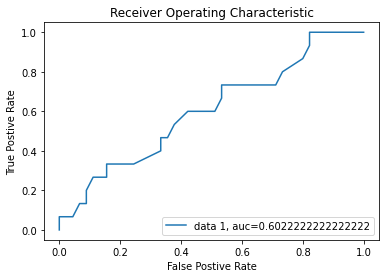

In [ ]:
plt.title('Receiver Operating Characteristic')
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba,pos_label='R')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='data 1, auc='+str(auc))
plt.legend(loc=4)
plt.ylabel('True Postive Rate')
plt.xlabel('False Postive Rate')
plt.show()